# Module 1 - Using Mistral-7B for zero-shot sentence classification

This notebook presents an example of how to use Mistral-7B-Instruct model to perform zero-shot sentence classification. Zero-shot sentence classification is a type of text classification task in Natural Language Processing (NLP) that involves categorizing a piece of text, typically a sentence or a document, into predefined categories, such as positive, negative, or neutral, without using any training data.

[Mistral](https://mistral.ai/news/announcing-mistral-7b/a) is an advanced language model developed by Mistral AI, featuring 7.3 billion parameters. It is noted for its efficiency and effectiveness, outperforming larger models on various benchmarks and excelling in tasks involving both code and natural language. Mistral 7B utilizes innovative attention mechanisms to process long sequences and allows for rapid fine-tuning across different tasks, including chat applications. It is openly available under the Apache 2.0 license for unrestricted use.

In this example, we evaluate Mistral-7B-Instruct on the Stanford Sentiment Treebank (SST-2).

* [Model](https://huggingface.co/mistralai/Mistral-7B-Instruct-v0.1)
* [Dataset](https://huggingface.co/datasets/glue/viewer/sst2/test)

# Installing required packages

In this example, we have to install two libraries:  `transformers` and `datasets`, both from Hugging Face. [Hugging Face](https://huggingface.co/) is an AI startup that has gained significant traction in the NLP community recently. It provides a suite of open-source tools and libraries, making it easy for developers and researchers to work with state-of-the-art NLP models.

**`transformers`**:

Transformers is an open-source library for NLP developed by Hugging Face. It provides state-of-the-art pre-trained models for various NLP tasks, such as text classification, sentiment analysis, question-answering, named entity recognition, etc. The library is built on top of PyTorch and TensorFlow and provides easy-to-use interfaces to access pre-trained models and fine-tune them on specific tasks. The library also provides tools for training custom models and sharing them with the community.

**`datasets`**:

Datasets is another open-source library developed by Hugging Face that provides a collection of preprocessed datasets for various NLP tasks, such as sentiment analysis, natural language inference, machine translation, and many more. The library provides a unified API to access these datasets, making it easy to load, process, and analyze them.




In [ ]:
!pip install transformers
!pip install datasets

# Setting the device

In this example, we will use a GPU to speed up the processing of our model. GPUs (Graphics Processing Units) are specialized processors that are optimized for performing large-scale computations in parallel. By using a GPU, we can accelerate the training and inference of a machine learning model, which can significantly reduce the time required to complete these tasks.

Before we begin, we need to check whether a GPU is available and select it as the default device for our PyTorch operations. This is because PyTorch can use either a CPU or a GPU to perform computations, and by default, it will use the CPU.

For using a GPU in Google Colab:
1. Click on the "Runtime" menu at the top of the screen.
2. From the dropdown menu, click on "Change runtime type".
3. In the popup window that appears, select "GPU" as the hardware accelerator.
4. Click on the "Save" button.

That's it! Now you can use the GPU for faster computations in your notebook.

In [ ]:
!nvidia-smi

Mon May 13 22:59:48 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA A100-SXM4-40GB          Off | 00000000:00:04.0 Off |                    0 |
| N/A   30C    P0              39W / 400W |      2MiB / 40960MiB |      0%      Default |
|                                         |                      |             Disabled |
+-----------------------------------------+----------------------+--

In [ ]:
import torch
device="cuda"

torch.set_default_device(device)

# Downloading the model

We use the **`transformers`** library to load the pre-trained Mistral-7B-Instruct model. The library provides a unified API to access various pre-trained models, including Mistral-7B-Instruct. It also provides tools to fine-tune these models on specific tasks, such as text classification, question-answering, etc.

We use the **`from_pretrained`** method to load the pre-trained model. The method takes the name of the model as an argument and returns a PyTorch model object. The name of the model is the name of the repository on the Hugging Face model hub. For example, the name of the Mistral-7B-Instruct model is **`mistralai/Mistral-7B-Instruct-v0.1`**.

The **`from_pretrained`** method also takes an optional **`torch_dtype`** argument, which specifies the data type of the model parameters. By default, the model parameters are stored in the **`float32`** data type, which is the standard data type for most deep learning models. However, we can also store the model parameters in the **`float16`** data type, which is a lower-precision data type that can reduce the memory requirements of the model. This can be useful when we are working with large models that do not fit in the memory of our GPU.

In this example, we will set the **`torch_dtype`** argument to **`"auto"`**, which will automatically select the data type based on the hardware we are using. If we are using a GPU, the model parameters will be stored in the **`float16`** data type, and if we are using a CPU, the model parameters will be stored in the **`float32`** data type.

We use the **`to`** method to move the model to the default device. This will ensure that the model parameters are stored in the memory of the GPU, if available, or the CPU, if a GPU is not available.

In [ ]:
from google.colab import userdata
# HF_KEY = userdata.get('hf_api_key')


# from huggingface_hub import login
# login(HF_KEY)

In [ ]:
import torch
import transformers
from transformers import AutoTokenizer, AutoModelForCausalLM

model = AutoModelForCausalLM.from_pretrained("mistralai/Mistral-7B-Instruct-v0.1",
                                             torch_dtype="auto")

model.to(device)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

MistralForCausalLM(
  (model): MistralModel(
    (embed_tokens): Embedding(32000, 4096)
    (layers): ModuleList(
      (0-31): 32 x MistralDecoderLayer(
        (self_attn): MistralSdpaAttention(
          (q_proj): Linear(in_features=4096, out_features=4096, bias=False)
          (k_proj): Linear(in_features=4096, out_features=1024, bias=False)
          (v_proj): Linear(in_features=4096, out_features=1024, bias=False)
          (o_proj): Linear(in_features=4096, out_features=4096, bias=False)
          (rotary_emb): MistralRotaryEmbedding()
        )
        (mlp): MistralMLP(
          (gate_proj): Linear(in_features=4096, out_features=14336, bias=False)
          (up_proj): Linear(in_features=4096, out_features=14336, bias=False)
          (down_proj): Linear(in_features=14336, out_features=4096, bias=False)
          (act_fn): SiLU()
        )
        (input_layernorm): MistralRMSNorm()
        (post_attention_layernorm): MistralRMSNorm()
      )
    )
    (norm): MistralRMSNorm(

We also load the tokenizer for the model using the **`AutoTokenizer.from_pretrained`** method. The tokenizer is used to convert a piece of text into a sequence of tokens, which can then be fed into the model.

In [ ]:
tokenizer = AutoTokenizer.from_pretrained("mistralai/Mistral-7B-Instruct-v0.1",
                                          torch_dtype="auto")

# Downloading Dataset

The SST-2 dataset, or the Stanford Sentiment Treebank, is popular for sentiment analysis tasks in Natural Language Processing (NLP). It consists of movie reviews from the Rotten Tomatoes website that are labeled with either a positive or negative sentiment. The dataset contains 10,662 sentence-level movie reviews, with approximately half of the reviews labeled as positive and the other half labeled as negative. The reviews are also relatively evenly distributed in length, with a median length of 18 tokens.

The SST-2 dataset has become a benchmark dataset for sentiment analysis in NLP, and many researchers use it to evaluate the performance of their models. The dataset's popularity is partly due to its high-quality labels and the task's relative simplicity, making it an accessible starting point for researchers and developers new to NLP.

In this example, we're using the **`datasets`** library to download and load the validation set of the dataset.

In [ ]:
from datasets import load_dataset

test_dataset = load_dataset('glue', 'sst2', split='validation')

The code below converts the `label` column of the dataset into a list of strings with `"positive"` and `"negative"` labels. This is for comparing the model's predictions with the actual labels of the dataset.

In [ ]:
POSITIVE_LABEL = "positive"
NEGATIVE_LABEL = "negative"

test_dataset = test_dataset.map(lambda example: {'label_name': POSITIVE_LABEL if example["label"] == 1 else NEGATIVE_LABEL})

In this code, we use the **`pandas`** library to import the SST-2 dataset and show the first 10 examples using the **`df.head(10)`** method. The dataset contains examples labeled as either 0 or 1, representing negative and positive, respectively. For instance, the first example is labeled as 1, which means it is a positive example. It reads "it's a charming and often affecting journey," while the second example is labeled as 0, meaning it is a negative example. It reads "unflinchingly bleak and desperate."
This way, you can have a quick overview of the dataset and its labeling.

In [ ]:
import pandas as pd

df = pd.DataFrame(test_dataset)
df.head(10)

,sentence,label,idx,label_name
0,it 's a charming and often affecting journey .,1,0,positive
1,unflinchingly bleak and desperate,0,1,negative
2,allows us to hope that nolan is poised to emba...,1,2,positive
3,"the acting , costumes , music , cinematography...",1,3,positive
4,"it 's slow -- very , very slow .",0,4,negative
5,although laced with humor and a few fanciful t...,1,5,positive
6,a sometimes tedious film .,0,6,negative
7,or doing last year 's taxes with your ex-wife .,0,7,negative
8,you do n't have to know about music to appreci...,1,8,positive
9,"in exactly 89 minutes , most of which passed a...",0,9,negative


# Model Evaluation

# Defining the instruction

Before running the inference, we need to define a **prompt template** that will be used to generate the predictions. The prompt is a piece of text that is used to generate the predictions. In this case, we use a prompt with the following elements:

1. The task definition `You are a sentiment classifier. Use "positive" or "negative"`;
2. The input text `Sentence: <>`; and
3. The classification marker `Sentiment:`.

In [ ]:
prompt = """[INST] You are a sentiment classifier. Use only "positive" or "negative".

Sentence: {sentence}
Classification:[/INST]"""

# Inference

The following code performs the inference stage of the evaluation Mistral-7B-Instruct model. We define a function called **`classify_sentence`** that is designed to use a pretrained model, likely a variant of a large language model similar to GPT, for sentiment analysis. The description below outlines the steps taken in the function to classify the sentiment of a given sentence as either positive, negative, or possibly neutral. I'll expand on the description by going through the function step-by-step:

1. The function accepts a single parameter, `sentence`, which is the text input whose sentiment is to be classified.

2. The `sentence` is formatted with the predefined prompt template. This prompt engineering is a common practice when using language models for specific tasks, as it provides context to the model about the task it is supposed to perform.

3. The `tokenizer` is applied to the formatted text. Tokenizers convert text into a format that models can understand, which in this case is a series of tokens. The tokenizer is configured to:
   - Return tensors compatible with PyTorch (`return_tensors="pt"`).
   - Not add special tokens that are usually used to indicate the start and end of a sequence (`add_special_tokens=False`).

4. The tokenized input (`encodeds`) is then converted to a PyTorch tensor and moved to the appropriate device (GPU) for inference.

5. The inference is performed inside a `torch.no_grad()` context manager, which disables gradient calculations. This is used because we are making predictions, not training the model, and therefore do not need gradients, which would only use extra memory and computational power.

6. The `model.generate` function is called to generate a response. This function takes several parameters, such as:
   - `**model_inputs`: The tokenized inputs prepared earlier.
   - `max_length=8000`: This sets the maximum length of the model's output. The choice of 8000 seems unusually high for sentence classification and might be tailored to specific requirements of the task or the model's capacity.
   - `bos_token_id=model.config.bos_token_id`: This specifies the beginning-of-sentence token id, signaling the model where a new sentence starts.
   - `eos_token_id=model.config.eos_token_id`: This specifies the end-of-sentence token id, signaling the model where a sentence ends.
   - `pad_token_id=model.config.eos_token_id`: This is used for padding shorter sentences to a uniform length. It's unusual to see the end-of-sentence token used for padding, which could be a specific requirement of this model or a mistake.

7. After the model generates a response, `torch.cuda.empty_cache()` is called to free up unused memory on the GPU. This is helpful in managing GPU resources, especially when processing multiple requests or dealing with large models.

8. Finally, the `tokenizer.decode` function is used to convert the model's output tokens back into human-readable text. The `skip_special_tokens=True` argument removes any special tokens (like padding or end-of-sentence tokens) from the output. The function also skips the input tokens (`outputs[0][len(model_inputs["input_ids"][0]):]`) to only return the newly generated text.


In [ ]:
def classify_sentence(sentence):
  text = prompt.format(sentence=sentence)
  encodeds = tokenizer(text, return_tensors="pt", add_special_tokens=False)
  model_inputs = encodeds.to(device)

  with torch.no_grad():
    outputs = model.generate(**model_inputs,max_length=8000,bos_token_id=model.config.bos_token_id,
                                eos_token_id=model.config.eos_token_id,
                                pad_token_id=model.config.eos_token_id
                             )
    torch.cuda.empty_cache()

  return tokenizer.decode(outputs[0][len(model_inputs["input_ids"][0]):], skip_special_tokens=True)

classify_sentence("This movie is very good")

'positive'

The code below uses the **`classify_sentence`** function to make predictions on the test dataset. We loop through the test dataset and apply the **`classify_sentence`** function to each example. The predictions are stored in a list called **`predictions`**.

In [ ]:
from tqdm import tqdm
predictions = []
references = test_dataset["label_name"]
for item in tqdm(test_dataset):
  predicted = classify_sentence(item['sentence'])
  predictions.append(predicted)


100%|██████████| 872/872 [01:40<00:00,  8.67it/s]


# Evaluation Metric

To compute accuracy, we need to define a custom **`string_accuracy`** function since model outputs text rather than numerical values. Therefore, we cannot use the built-in accuracy function directly, which expects numerical values as inputs.

The following code defines the **`string_accuracy`** function. It takes two lists of strings as inputs, **`predictions`** and **`references`**. The function computes accuracy by counting the number of predictions that match the corresponding reference and dividing by the total number of predictions.

In [ ]:
def string_accuracy(predictions, references):
    correct = sum([1 for p, r in zip(predictions, references) if p.lower() == r.lower()])
    total = len(predictions)
    return correct / total

# Evaluation

We can compute the accuracy of our approach using the **`string_accuracy`** function defined earlier. The function takes two lists of strings as inputs, **`predictions`** and **`references`**. The function computes accuracy by counting the number of predictions that match the corresponding reference and dividing by the total number of predictions.

In [ ]:
from collections import Counter
c = Counter(predictions)
c.most_common()

[('negative', 534),
 ('positive', 252),
 ('Negative', 68),
 ('Positive', 7),
 ('The classification of the sentence is "positive".', 5),
 ('Negative.', 2),
 ('The sentiment of the sentence is "positive".', 2),
 ('Positive, Negative, Positive', 1),
 ('The sentiment of the sentence is neutral.', 1)]

The model can generate texts others than "positive" and "negative". This way, we need to post-process the output.

In [ ]:
predictions = [p.lower() for p in predictions]
predictions = ["negative" if p != "positive" else p for p in predictions]

Then, we can calculate the accuracy.

In [ ]:
accuracy = string_accuracy(predictions=predictions, references=references)
accuracy

0.7809633027522935

We also can plot a confusion matrix to see how the model performed on each class. Let's compute the confusion matrix using the **`confusion_matrix`** function from the **`sklearn.metrics`** library. The function takes two lists of strings as inputs, **`predictions`** and **`references`**. The function computes the confusion matrix by counting the number of predictions that match the corresponding reference and dividing by the total number of predictions. Then, we use the **`heatmap`** function from the **`seaborn`** library to plot the confusion matrix.

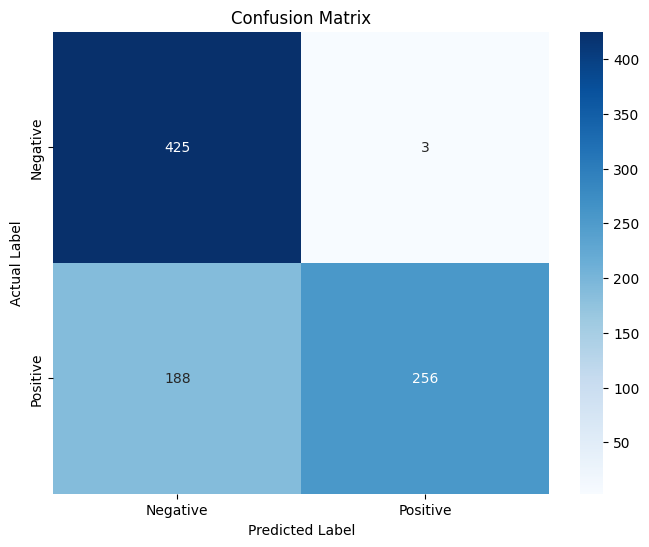

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns


# Convert labels to a numerical form
labels = {"positive": 1, "negative": 0}
y_true_num = [labels[label] for label in references]
y_pred_num = [labels[label] for label in predictions]

# Compute the confusion matrix
cm = confusion_matrix(y_true_num, y_pred_num)

# Plot the confusion matrix using seaborn
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])

# Labels, title, and ticks
ax.set_ylabel('Actual Label')
ax.set_xlabel('Predicted Label')
ax.set_title('Confusion Matrix')

# Show the plot
plt.show()


# Try it yourself

You can try sentiment analysis with your own sentences by providing the input text as a string to the **`text`** variable in the code snippet provided below.

The code defines a function **`classify_sentence`** that takes a string **`text`** as input. The **`text`** variable should be provided with a sentence or a text fragment for which sentiment analysis needs to be performed.

In [ ]:
text = "This movie is awesome!" # @param
class_label = classify_sentence(text)
print(f"The sentence '{text}' is classified as '{class_label}'.")

The sentence 'This movie is awesome!' is classified as 'positive'.
